## 下载数据集

In [46]:
# geektutu.com
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, datasets, models

(train_x, train_y), (test_x, test_y) = datasets.cifar10.load_data()

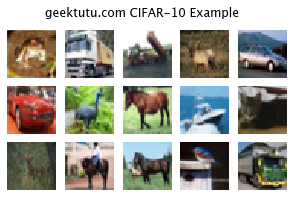

In [47]:
# geektutu.com
plt.figure(figsize=(5, 3))
plt.subplots_adjust(hspace=0.1)
for n in range(15):
    plt.subplot(3, 5, n+1)
    plt.imshow(train_x[n])
    plt.axis('off')
_ = plt.suptitle("geektutu.com CIFAR-10 Example")

In [48]:
# geektutu.com
train_x, test_x = train_x / 255.0, test_x / 255.0
print('train_x shape:', train_x.shape, 'test_x shape:', test_x.shape)
# (50000, 32, 32, 3), (10000, 32, 32, 3)

train_x shape: (50000, 32, 32, 3) test_x shape: (10000, 32, 32, 3)


## 卷积层

In [52]:
# geektutu.com
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


## 全连接层

In [53]:
# geektutu.com
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

## 编译训练模型

In [54]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_x, train_y, epochs=5)

W0720 16:46:59.197520 140735530943360 deprecation.py:323] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 20s 394us/sample - loss: 1.4972 - accuracy: 0.4585
Epoch 2/5
50000/50000 [==============================] - 19s 386us/sample - loss: 1.1277 - accuracy: 0.6025
Epoch 3/5
50000/50000 [==============================] - 20s 398us/sample - loss: 0.9836 - accuracy: 0.6541
Epoch 4/5
50000/50000 [==============================] - 20s 404us/sample - loss: 0.8808 - accuracy: 0.6917
Epoch 5/5
50000/50000 [==============================] - 20s 406us/sample - loss: 0.8040 - accuracy: 0.7179


## 评估模型

In [58]:
# geektutu.com
test_loss, test_acc = model.evaluate(test_x, test_y)
test_acc # 0.683

10000/10000 [==============================] - 1s 122us/sample - loss: 0.9077 - accuracy: 0.6830


0.683